In [ ]:
!nvidia-smi

Tue May 10 01:29:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
print (tf.test.gpu_device_name())

/device:GPU:0


In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


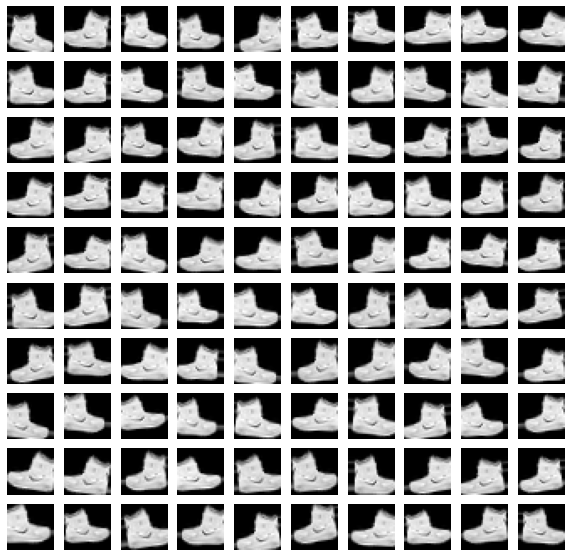

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 이 ImageDataGenerator 코드 부분은 다음 링크에서 참조했습니다. 
# https://github.com/franneck94/MNIST-Data-Augmentation/blob/master/mnist.py
# rotation, zoom, shift, flip 등을 지정합니다.
image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            shear_range=0.5,
            width_shift_range=0.10,
            height_shift_range=0.10,
            horizontal_flip=True,
            vertical_flip=False)

augment_size = 100

x_augmented = image_generator.flow(np.tile(train_input[0].reshape(28*28),100).reshape(-1,28,28,1), np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# 새롭게 생성된 이미지 표시
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for c in range(100):
    plt.subplot(10,10,c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
train_input = train_input.reshape(-1, 28, 28, 1)

In [ ]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            shear_range=0.5,
            width_shift_range=0.10,
            height_shift_range=0.10,
            horizontal_flip=True,
            vertical_flip=False)

augment_size = 30000

randidx = np.random.randint(train_input.shape[0], size=augment_size)

In [ ]:
x_augmented = train_input[randidx].copy()
y_augmented = train_target[randidx].copy()


In [ ]:
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size=augment_size, shuffle=False).next()[0]

# 원래 데이터인 x_train 에 Image Augmentation 된 x_augmented 를 추가합니다.
train_X = np.concatenate((train_input, x_augmented))
train_Y = np.concatenate((train_target, y_augmented))

print(train_X.shape)
train_X = train_X/ 255.0

(90000, 28, 28, 1)


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', 
                              input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2)) 	
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_X, train_Y, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
2813/2813 [==============================] - 29s 7ms/step - loss: 0.5751 - accuracy: 0.7906 - val_loss: 0.2999 - val_accuracy: 0.8882
Epoch 2/20
2813/2813 [==============================] - 19s 7ms/step - loss: 0.4026 - accuracy: 0.8527 - val_loss: 0.2481 - val_accuracy: 0.9078
Epoch 3/20
2813/2813 [==============================] - 19s 7ms/step - loss: 0.3470 - accuracy: 0.8732 - val_loss: 0.2144 - val_accuracy: 0.9213
Epoch 4/20
2813/2813 [==============================] - 19s 7ms/step - loss: 0.3095 - accuracy: 0.8868 - val_loss: 0.1893 - val_accuracy: 0.9280
Epoch 5/20
2813/2813 [==============================] - 19s 7ms/step - loss: 0.2840 - accuracy: 0.8952 - val_loss: 0.1630 - val_accuracy: 0.9411
Epoch 6/20
2813/2813 [==============================] - 19s 7ms/step - loss: 0.2628 - accuracy: 0.9022 - val_loss: 0.1627 - val_accuracy: 0.9368
Epoch 7/20
2813/2813 [==============================] - 19s 7ms/step - loss: 0.2471 - accuracy: 0.9075 - val_loss: 0.1417 - val_ac